In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **Load Data**

In [3]:
data_path = '/content/drive/MyDrive/Dataset Midterm/Customer-Churn-Records.csv'

In [4]:
df = pd.read_csv(data_path)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [6]:
for col in df.columns:
  print('%s:%s'%(col, df[col].unique()))

RowNumber:[    1     2     3 ...  9998  9999 10000]
CustomerId:[15634602 15647311 15619304 ... 15584532 15682355 15628319]
Surname:['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
CreditScore:[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 7

# **EDA**

In [7]:
df2 = df.copy()

In [8]:
df2['Exited'] = df['Exited'].replace({0:"No", 1:"Yes"})

In [9]:
exit_count = df2['Exited'].value_counts()
exit_count

No     7962
Yes    2038
Name: Exited, dtype: int64

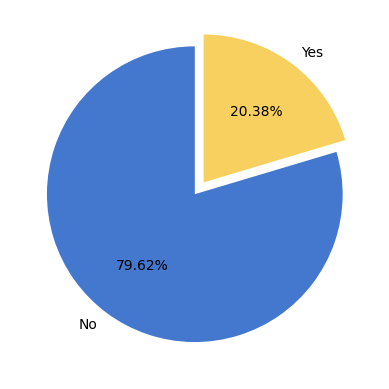

In [10]:
plt.pie(exit_count, labels=exit_count.index, colors=['#4477CE','#F7D060'], explode=[0,0.1], autopct = '%1.2f%%', startangle=90)
plt.show()

## **Function for EDA**

In [11]:
def qcut_func(df, col, new_col, q, labels):
  '''
  This function is used for cutting the values of a column into different groups.

  Paramater:
  df: data frame
  col: column that needs to be cut
  new_col: new column that has cut values
  q: number of quantiles
  labels: the labels for each group

  This function will return a data frame.
  '''

  df[new_col] = pd.qcut(df[col], q=q, labels=labels)

  return df

In [12]:
def count_exit_df(df, groupby_col, exited_col):
  '''
  This function is used for creating a new data frame that counts number of 'Exited' users grouped by a specific column.

  Parameters:
  df: data frame
  groupby_col: a group-by column
  exited_col: a calculated column - an 'Exited' column

  This function will return a new data frame.
  '''

  new_df = df.groupby(groupby_col)[exited_col].value_counts().unstack().reset_index()
  new_df.fillna(0, inplace=True)
  new_df['Total'] = new_df['Yes'] + new_df['No']
  new_df['Exit_Rate'] = np.where(new_df['Total']==0, 0, (new_df['Yes']/new_df['Total'])*100)

  return new_df

In [13]:
def combination(df, combined_col, col_1, col_2):
  '''
  This function is used for combining 2 columns.

  Parameter:
  df: data frame
  col_1: 1st column
  col_2: 2nd column

  This function will return a data frame.
  '''
  df[combined_col] = df[col_1].astype('str')+ " - " + df[col_2].astype('str')

  return df

In [14]:
def calculate_mean(df, groupby_col, calculated_col):
  '''
  This function is used for calculating mean grouped by one column.

  Parameters:
  df: data frame
  groupby_col: a grouped column
  calculated_col: a column needs calculating

  This function will return a new df based on an output series.
  '''

  new_df = df.groupby[groupby_col](calculated_col).mean().round(2).reset_index

  return new_df

In [15]:
def barplot(data, x, y, title):
  '''
  This function is used for visualizing a bar chart.

  Parameters:
  data: data frame or array
  x: x variables
  y: y variables
  title: the title of a bar chart

  This function will draw a bar chart.
  '''

  if data[x].nunique() <= 3:
    palette = ['#F24A72', '#FFD93D', '#6BCB77'] #If the number of columns is less or equal to 3, the palette contains 3 specific colors.
  else:
    palette = sns.color_palette('husl', data[x].nunique())

  plt.figure(figsize=(10,8))
  sns.barplot(data=data, x=x, y=y, palette=palette)

  if data[x].nunique() > 7:
    plt.xticks(rotation=90)
  else:
    plt.xticks(rotation=0)

  plt.xlabel(x)
  plt.ylabel(y)
  plt.title(title)
  plt.show()

## **Exploration**

### Age
> Whether younger users tend to leave a bank than older users.





In [16]:
labels_age = ['18-32', '32-37', '37-44', '44-92']

In [17]:
df2 = qcut_func(df2, 'Age', 'Age_Group', q=4, labels=labels_age)

In [18]:
Age_group = count_exit_df(df2, 'Age_Group', 'Exited')
Age_group

Exited,Age_Group,No,Yes,Total,Exit_Rate
0,18-32,2577,213,2790,7.634409
1,32-37,2048,249,2297,10.840226
2,37-44,2041,532,2573,20.676253
3,44-92,1296,1044,2340,44.615385


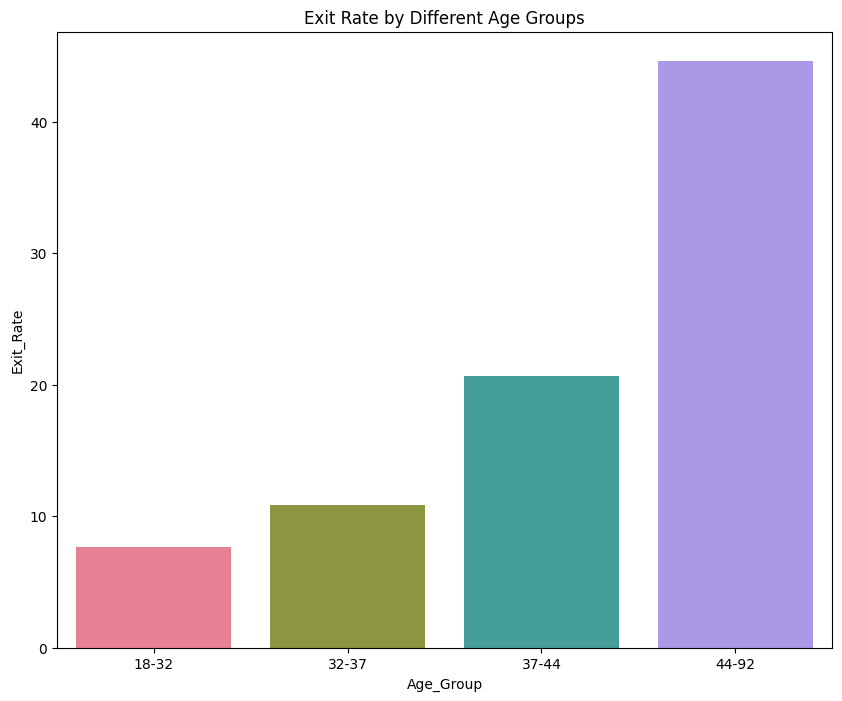

In [19]:
x = 'Age_Group'
y = 'Exit_Rate'
title = 'Exit Rate by Different Age Groups'
age_barplot = barplot(Age_group, x, y, title)

The exit rate seems different from the hypothesis mentioned above.

### Geography

In [20]:
geography = count_exit_df(df2, 'Geography', 'Exited')
geography

Exited,Geography,No,Yes,Total,Exit_Rate
0,France,4203,811,5014,16.174711
1,Germany,1695,814,2509,32.443204
2,Spain,2064,413,2477,16.673395


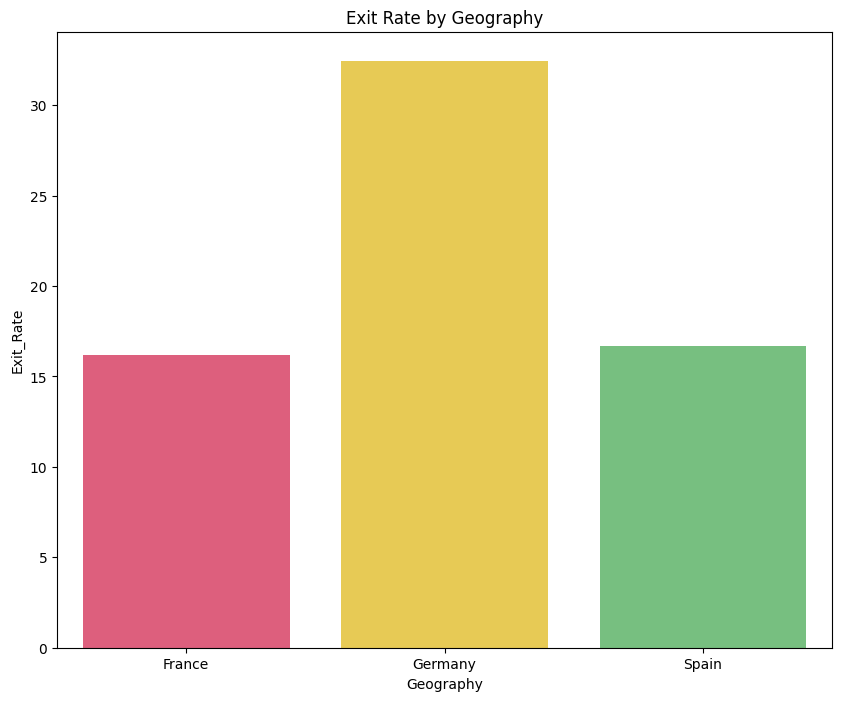

In [21]:
x = 'Geography'
y = 'Exit_Rate'
title = 'Exit Rate by Geography'
geo_barplot = barplot(geography, x, y, title)

### Tenure


> If a customer has engaged with a bank for a long time, he/she is not likely to leave a bank.



In [22]:
labels_tenure = ['0-2', '2-4', '4-6', '6-8','8-10']

In [23]:
df2 = qcut_func(df2,'Tenure','Tenure_Group', 5, labels_tenure)

In [24]:
tenure_group = count_exit_df(df2, 'Tenure_Group', 'Exited')
tenure_group

Exited,Tenure_Group,No,Yes,Total,Exit_Rate
0,0-2,1968,528,2496,21.153846
1,2-4,1582,416,1998,20.820821
2,4-6,1574,405,1979,20.464881
3,6-8,1679,374,2053,18.217243
4,8-10,1159,315,1474,21.370421


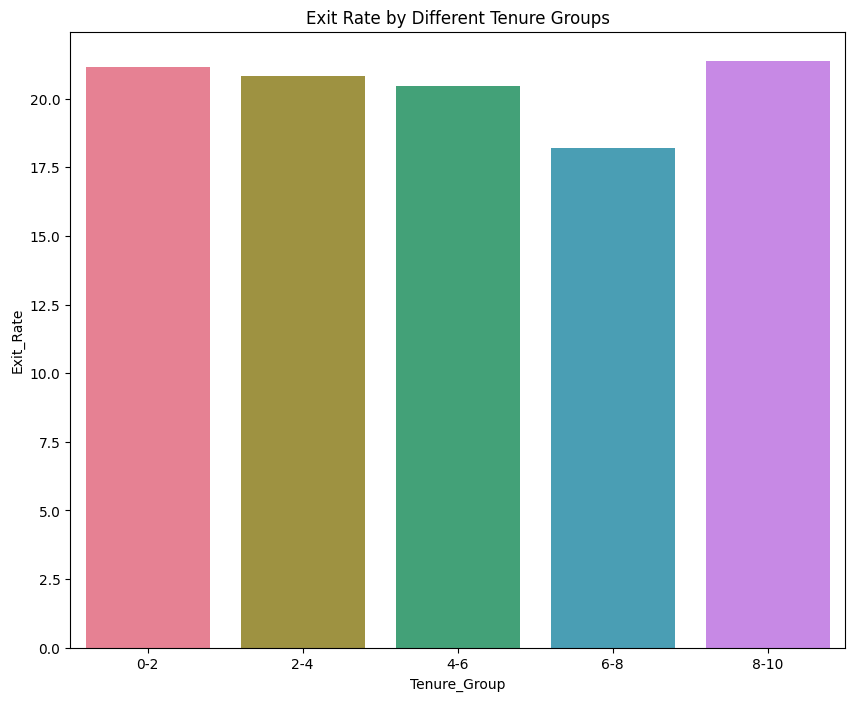

In [25]:
x = 'Tenure_Group'
y = 'Exit_Rate'
title = 'Exit Rate by Different Tenure Groups'
tenure_barplot = barplot(tenure_group, x, y, title)

There are no differences between long-term users and short-term users in exit rates.

However, the number of exited customers who had stayed for 6-8 years seems noticeable

### **Number of Products**

> If a customer use many products at a bank, he/she tends to stay longer.



In [26]:
num_of_products = count_exit_df(df2, 'NumOfProducts', 'Exited')
num_of_products

Exited,NumOfProducts,No,Yes,Total,Exit_Rate
0,1,3675.0,1409.0,5084.0,27.714398
1,2,4241.0,349.0,4590.0,7.603486
2,3,46.0,220.0,266.0,82.706767
3,4,0.0,60.0,60.0,100.000000


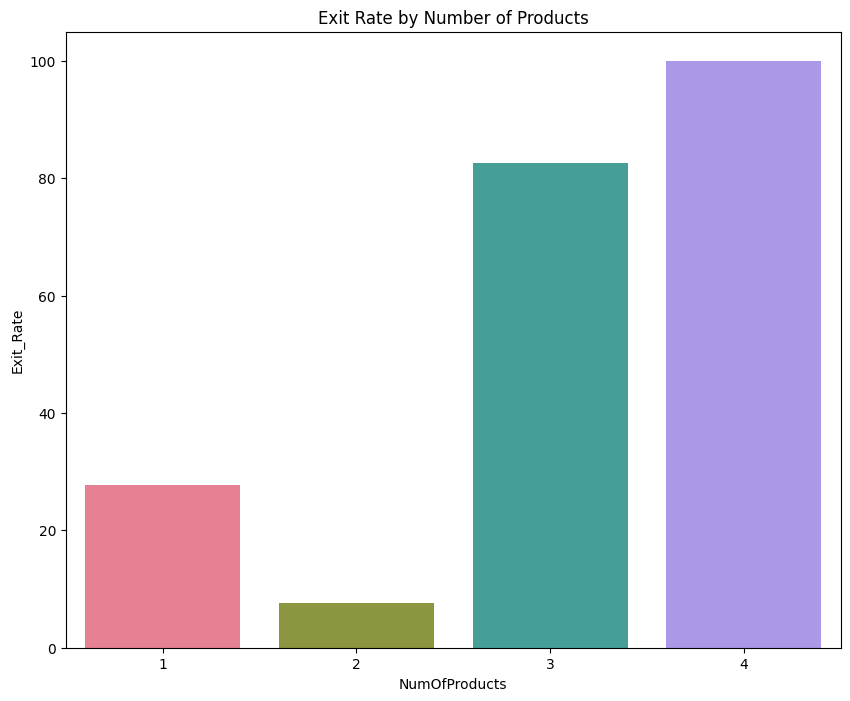

In [27]:
x = 'NumOfProducts'
y = 'Exit_Rate'
title = 'Exit Rate by Number of Products'
numofprd_barplot = barplot(num_of_products, x, y, title)

The data is opposite to the hypothesis.

### Card Type and Point Earned


> A customer having a low tier member card at a bank is more likely to leave.


> The lower the point is earned, the higher the posibility that a customer leave a bank.





In [28]:
col_1 = df2['Card Type'].unique()
col_1

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

In [29]:
max_point = df2['Point Earned'].max()
print(max_point)
min_point = df2['Point Earned'].min()
print(min_point)

1000
119


In [30]:
order = ['SILVER', 'GOLD', 'PLATINUM', 'DIAMOND']
df2['Card Type'] = pd.Categorical(df2['Card Type'], categories=order, ordered=True)

In [31]:
card_type = count_exit_df(df2, 'Card Type', 'Exited')
card_type

Exited,Card Type,No,Yes,Total,Exit_Rate
0,SILVER,1994,502,2496,20.112179
1,GOLD,2020,482,2502,19.264588
2,PLATINUM,1987,508,2495,20.360721
3,DIAMOND,1961,546,2507,21.779019


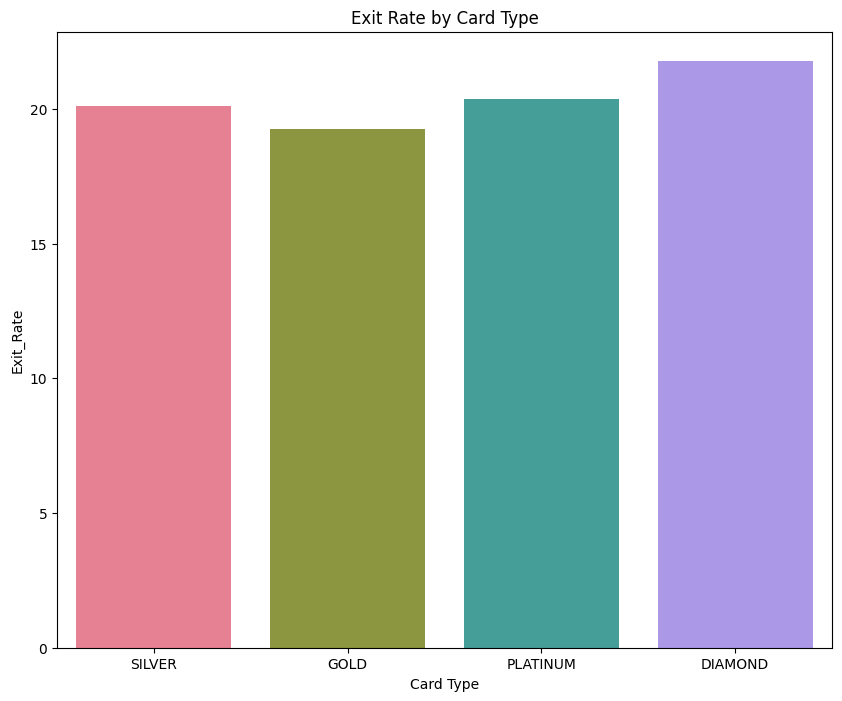

In [32]:
x = 'Card Type'
y = 'Exit_Rate'
title = 'Exit Rate by Card Type'
card_barplot = barplot(card_type, x, y, title)

In [33]:
labels_point = ['119-410', '410-605', '605-801', '801-1000']

In [34]:
df2 = qcut_func(df2, 'Point Earned', 'Point_Earned_Group', 4, labels_point)

In [35]:
point = count_exit_df(df2, 'Point_Earned_Group', 'Exited')
point

Exited,Point_Earned_Group,No,Yes,Total,Exit_Rate
0,119-410,1974,527,2501,21.071571
1,410-605,2029,481,2510,19.163347
2,605-801,1969,538,2507,21.459912
3,801-1000,1990,492,2482,19.822724


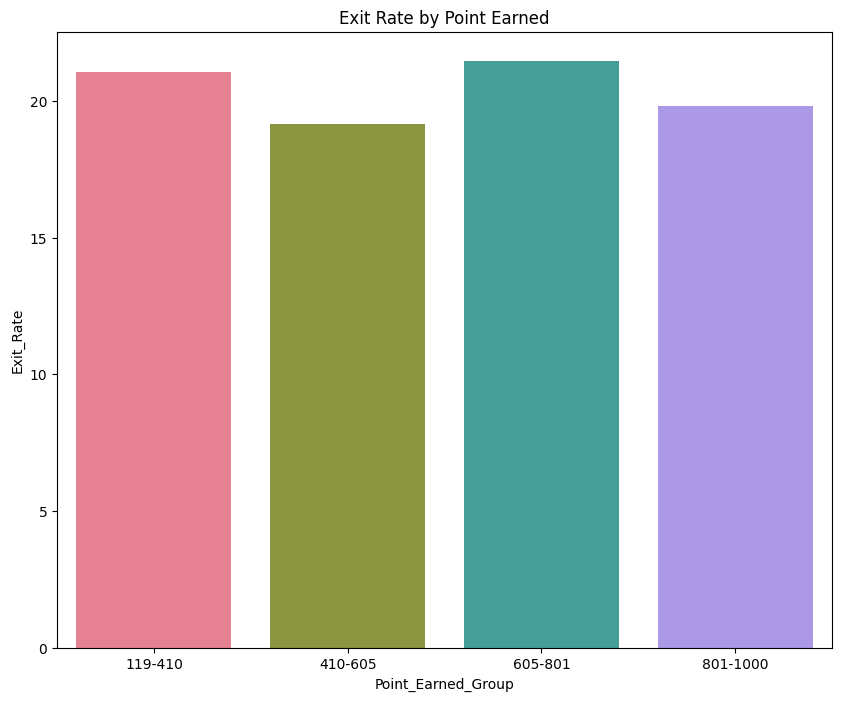

In [36]:
x = 'Point_Earned_Group'
y = 'Exit_Rate'
title = 'Exit Rate by Point Earned'
point_barplot = barplot(point, x, y, title)

Combine 2 features Card Type and Point Earned

In [37]:
df2 = combination(df2, 'Point_CardType', 'Point_Earned_Group', 'Card Type')

In [38]:
card_point = count_exit_df(df2, 'Point_CardType', 'Exited')
card_point

Exited,Point_CardType,No,Yes,Total,Exit_Rate
0,119-410 - DIAMOND,486,149,635,23.464567
1,119-410 - GOLD,492,124,616,20.129870
2,119-410 - PLATINUM,512,118,630,18.730159
3,119-410 - SILVER,484,136,620,21.935484
4,410-605 - DIAMOND,498,129,627,20.574163
5,410-605 - GOLD,529,112,641,17.472699
6,410-605 - PLATINUM,478,132,610,21.639344
7,410-605 - SILVER,524,108,632,17.088608
8,605-801 - DIAMOND,483,142,625,22.720000
9,605-801 - GOLD,505,135,640,21.093750


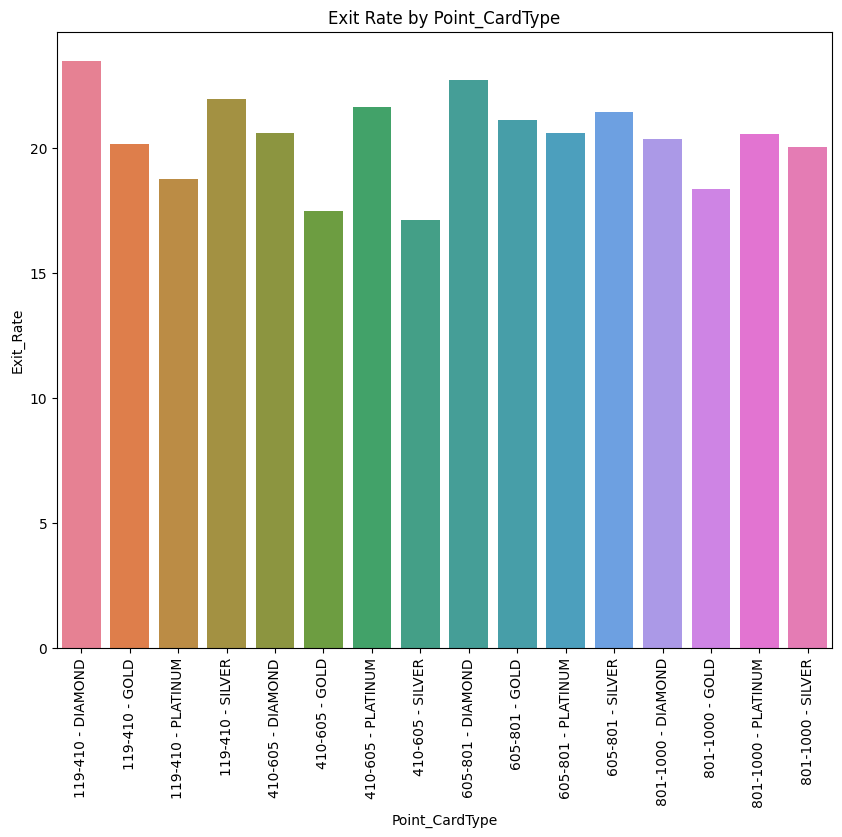

In [39]:
x = 'Point_CardType'
y = 'Exit_Rate'
title = 'Exit Rate by Point_CardType'
point_card_barplot = barplot(card_point, x, y, title)

The gap between different groups is not huge.

### Satisfaction and Complaint


> The higher the satisfaction score is, the longer a customer stay.


> A customer who complain a bank. Is he/she unhappy with a bank service? Or does he/she want to make feedbacks to help a bank improve its service?





In [40]:
satisfaction = count_exit_df(df2, 'Satisfaction Score', 'Exited')
satisfaction

Exited,Satisfaction Score,No,Yes,Total,Exit_Rate
0,1,1545,387,1932,20.031056
1,2,1575,439,2014,21.797418
2,3,1641,401,2042,19.637610
3,4,1594,414,2008,20.617530
4,5,1607,397,2004,19.810379


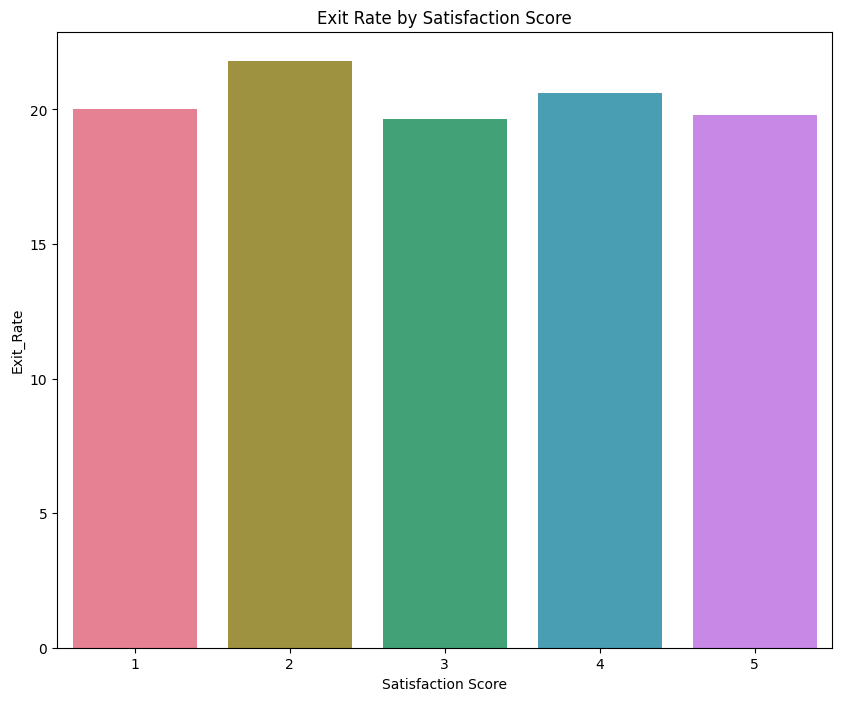

In [41]:
x = 'Satisfaction Score'
y = 'Exit_Rate'
title = 'Exit Rate by Satisfaction Score'
satisfaction_barplot = barplot(satisfaction, x, y, title)

In [42]:
df2['Complain'] = df2['Complain'].replace({0:"No", 1:"Yes"})

In [43]:
complain = count_exit_df(df2, 'Complain', 'Exited')
complain

Exited,Complain,No,Yes,Total,Exit_Rate
0,No,7952,4,7956,0.050277
1,Yes,10,2034,2044,99.510763


This output answers the hypothesis above that most customers making a complaint about a bank are not satisfied with this. Thus, they leave the bank.

### Monetary Factors

Credit Card

In [46]:
df2['HasCrCard'] = df2['HasCrCard'].replace({0:"No", 1:"Yes"})

In [47]:
cr_card = count_exit_df(df2, 'HasCrCard', 'Exited')
cr_card

Exited,HasCrCard,No,Yes,Total,Exit_Rate
0,No,2332,613,2945,20.814941
1,Yes,5630,1425,7055,20.198441


Balance


> The lower the balance is, the more likely customers leave a bank.



In [48]:
min_balance = df2['Balance'].min()
print(min_balance)
max_balance = int(df2['Balance'].max())
print(max_balance)

0.0
250898


In [49]:
labels_balance = ['0-73K','73K-110K','110K-134K', '134K-251K']
df2['Balance_group'] = pd.qcut(df2['Balance'], q=5, labels=labels_balance, duplicates='drop')

In [50]:
balance_group = count_exit_df(df2, 'Balance_group', 'Exited')
balance_group

Exited,Balance_group,No,Yes,Total,Exit_Rate
0,0-73K,3410,590,4000,14.75
1,73K-110K,1553,447,2000,22.35
2,110K-134K,1461,539,2000,26.95
3,134K-251K,1538,462,2000,23.10


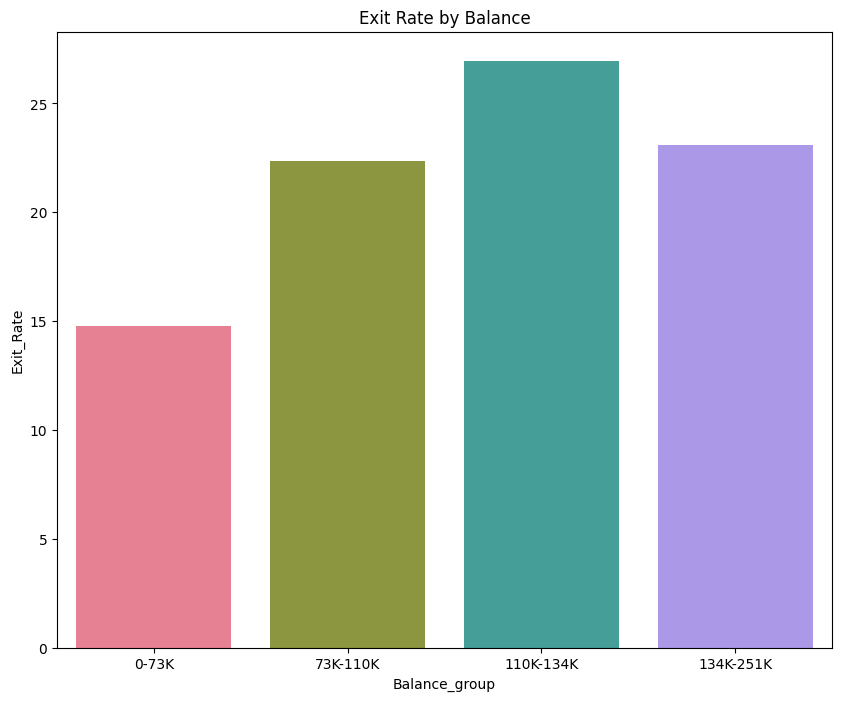

In [51]:
x = 'Balance_group'
y = 'Exit_Rate'
title = 'Exit Rate by Balance'
balance_barplot = barplot(balance_group, x, y, title)

In [52]:
df2['CreditScore'].max()

850

In [53]:
df2['CreditScore'].min()

350

In [54]:
labels_credit = ['350-608', '608-695', '695-850']

In [55]:
df2 = qcut_func(df2, 'CreditScore', 'Credit', 3, labels_credit)

In [56]:
credit = count_exit_df(df2, 'Credit', 'Exited')
credit

Exited,Credit,No,Yes,Total,Exit_Rate
0,350-608,2639,724,3363,21.528397
1,608-695,2675,659,3334,19.766047
2,695-850,2648,655,3303,19.830457


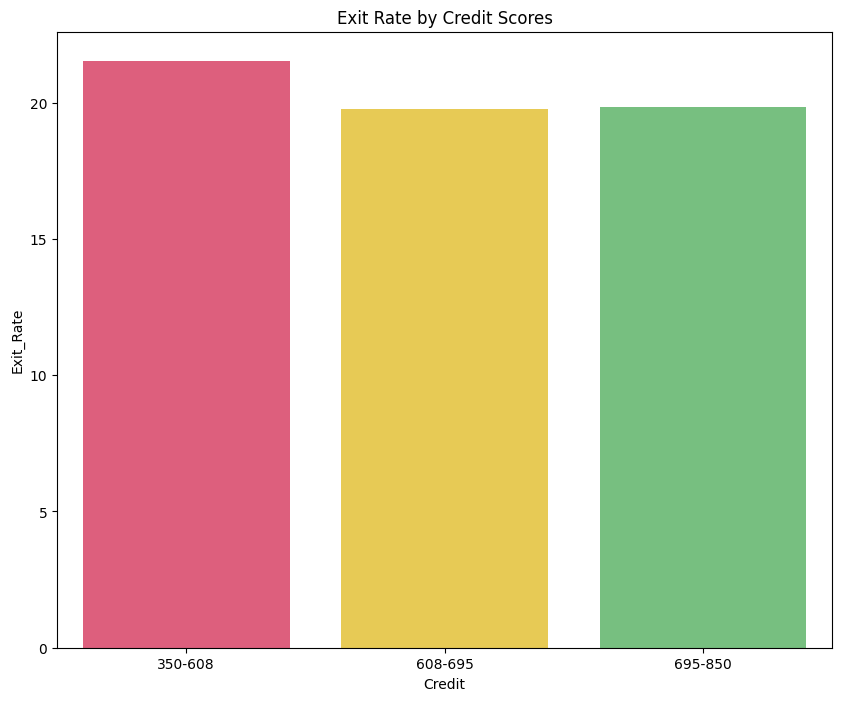

In [57]:
x = 'Credit'
y = 'Exit_Rate'
title = 'Exit Rate by Credit Scores'
credit_barplot = barplot(credit, x, y, title)

# **Data Preprocessing**

In [61]:
def replace_cardtype(df, col):
  '''
  This function is used for replacing a sorted column.

  Parameters:
  df: data frame
  col: a column that needs replacing values
  '''

  df[col] = df[col].replace({'SILVER':0, 'GOLD':1, 'PLATINUM':2, 'DIAMOND':3})

  return df

In [68]:
def encode(df, col):
  '''
  This function is used for transforming categorical variables to numeric values.

  Parameters:
  df: data frame
  col: a column that needs encoding.
  '''

  df = pd.get_dummies(df, col)

  return df


In [63]:
def scale_data(df, list_of_cols):
  '''
  This function is used for scaling data.

  Parameters:
  df: data frame
  list_of_cols: a list of columns that need scaling
  '''
  scaler = StandardScaler()
  df[list_of_cols] = scaler.fit_transform(df[list_of_cols])

  return df

In [64]:
def imbalance_process(df, label):
  X = df.drop(label, axis=1)
  y = df[label]
  smote = SMOTE(random_state=42)
  X_resample, y_resample = smote.fit_resample(X, y)

  return X_resample, y_resample

# **Master Data for Training**

In [65]:
#Create a new data frame that includes relative features mentioned on the hypothesis above for modeling

df_model = df.loc[:,['Age','Geography', 'Tenure', 'NumOfProducts', 'Card Type', 'Point Earned', 'Complain', 'Balance', 'Exited']]
df_model

,Age,Geography,Tenure,NumOfProducts,Card Type,Point Earned,Complain,Balance,Exited
0,42,France,2,1,DIAMOND,464,1,0.00,1
1,41,Spain,1,1,DIAMOND,456,1,83807.86,0
2,42,France,8,3,DIAMOND,377,1,159660.80,1
3,39,France,1,2,GOLD,350,0,0.00,0
4,43,Spain,2,1,GOLD,425,0,125510.82,0
...,...,...,...,...,...,...,...,...,...
9995,39,France,5,2,DIAMOND,300,0,0.00,0
9996,35,France,10,1,PLATINUM,771,0,57369.61,0
9997,36,France,7,1,SILVER,564,1,0.00,1
9998,42,Germany,3,2,GOLD,339,1,75075.31,1


In [66]:
df_model = replace_cardtype(df_model, 'Card Type')

In [70]:
df_model = encode(df_model, 'Geography')

In [71]:
cols_to_scale = ['Age', 'Tenure', 'NumOfProducts', 'Complain', 'Point Earned', 'Balance']

In [72]:
df_model = scale_data(df_model, cols_to_scale)

In [73]:
X_resample, y_resample = imbalance_process(df_model, 'Exited')

# **Prepare Data for Training**

In [74]:
def split_data(df, label):
  '''
  This function is used for splitting data into train and test.

  Parameters:
  df: data frame that used for building model
  label: a predicted column

  This function will return X_train, X_test, y_train, y_test
  '''

  X = df.drop(label, axis=1)
  y = df[label]

  X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=43)

  return X_train, X_test, y_train, y_test

In [75]:
X_train, X_test, y_train, y_test = split_data(df_model, 'Exited')

# **Build Model**

In [77]:
def build_model(df, model_type):
  '''
  This function is used for building model.

  Parameters:
  df: data frame that used for modeling
  model_type: name of the model

  This function will return a model.
  '''

  model_type == 'LogReg'
  model = LogisticRegression(random_state=43)
  model.fit(X_train, y_train)

  return model

In [78]:
model_logreg = build_model(df_model, 'LogReg')

# **Evaluate Model**

In [79]:
def evaluate(df, model):
  '''
  This function is used for evaluation a built model.

  Parameters:
  df: data frame that is used for modeling
  model: name of a model

  This function will return a model score, an accuracy score, a classification report and a heatmap showing confusion matrix.
  '''

  y_predict = model.predict(X_test)
  print(model.score(X_train, y_train))
  print(accuracy_score(y_test, y_predict))
  cf_matrix = confusion_matrix(y_test, y_predict)
  sns.heatmap(cf_matrix, annot=True)
  print(classification_report(y_test, y_predict))

0.9985085171520528
0.9984301412872841
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1603
           1       1.00      1.00      1.00      1582

    accuracy                           1.00      3185
   macro avg       1.00      1.00      1.00      3185
weighted avg       1.00      1.00      1.00      3185



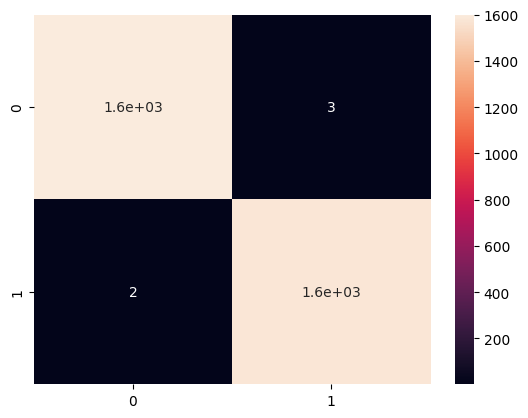

In [80]:
evaluate(df_model, model_logreg)

In [81]:
def feature_importance_lg(model, X_train, model_type):
      '''
      This function is used for plotting feature importances of Logistic Regression Model.

      Parameters:
      model: name of a model
      X_train: feature columns
      model_type: a type of model that is used in a buiding-model step above.

      This function will return a chart that shows feature importances.
      '''

      features = X_train.columns
      importances = np.abs(model.coef_[0]) #hệ số coef cho
      indices = np.argsort(importances)

      #Draw a chart
      plt.figure(figsize=(8, len(indices) * 0.3))
      plt.title('Feature Importances')
      plt.barh(range(len(indices)), importances[indices], color='#FFB84C', align='center')
      plt.yticks(range(len(indices)), [features[i] for i in indices])
      plt.xlabel('Absolute Coefficient')
      plt.show()

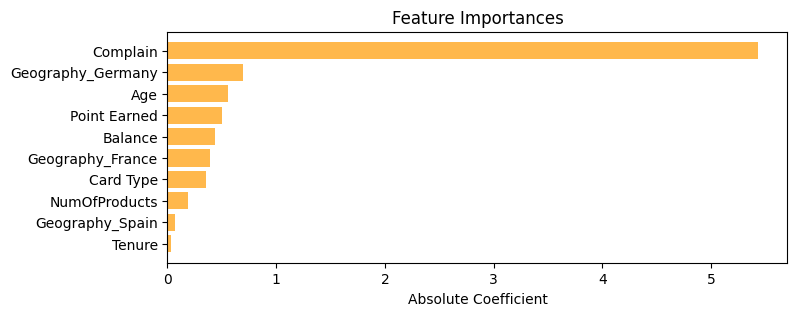

In [82]:
feature_importance_lg(model_logreg, X_train, 'LogReg')